In [1]:
#import libraries
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [4]:
#import the raw file

df = pd.read_csv('C:/UofT/Data analysis/TA data analysis_Nita/Phil_Rajib_project/Analysis/Pt1_DCM_chirp_corrected.csv')
# df.head(2)
#set the first column as the index

df1 = df.set_index('Wavelength')
# df1.head(2)

# change the column values to float type

k = [float(i) for i in list(df1.columns)]
df1.columns = k

In [5]:
#define dunction that plots the dataframe

def plot_df(df, vmin, vmax):    
    
    #plotting the data

    x1 = df.columns
    y1 = df.index
    z1 = df
    X1,Y1 = np.meshgrid(x1,y1)
    Z1 = z1
    img = plt.contourf(X1,Y1,Z1,50, cmap='jet', vmin=-vmin, vmax=vmax )
    plt.colorbar(img)
    return

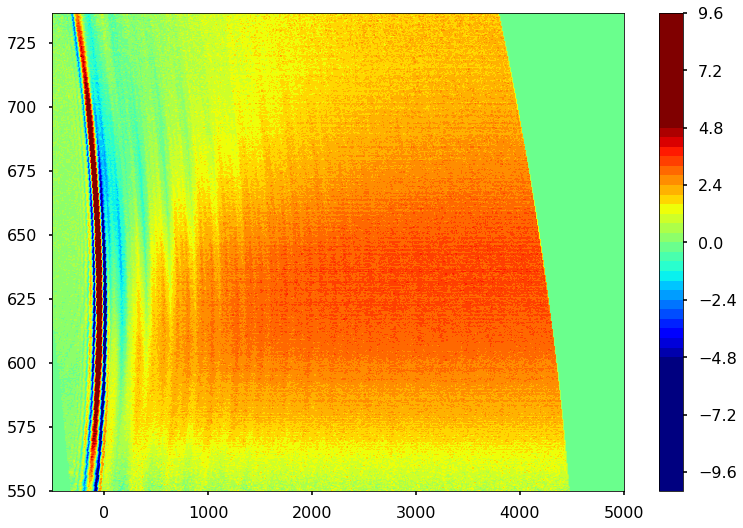

In [6]:
plot_df(df1, 5,5)

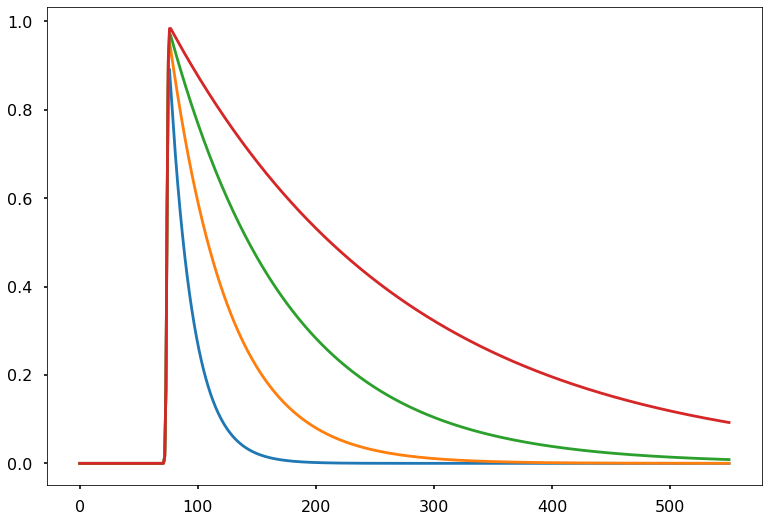

In [10]:
from scipy.optimize import curve_fit
from scipy.special import erf

def func_B(t, t_1):
    B=20
    t0 = 2.38110371e+02
    f = (np.exp((B/(2*1.66511*t_1))**2 - ((t-t0)/t_1))*0.5*(erf(((t-t0)/B)*1.66511 - (B/(2*1.66511*t_1))) + 1)) 
    return f 

# t0=2.38110371e+02
time = [200, 500, 1000, 2000]
t1 = list(df1.columns)

for i in range(len(time)):
    plt.plot(func_B (np.array(t1), time[i]))

In [11]:
df1.shape

(1052, 551)

In [12]:
# x = np.linspace(0, 200, 201)
# y = np.linspace(0, 200, 201)
# X, Y = np.meshgrid(x, y)

x = df.columns
y = df.index
X, Y = np.meshgrid(x, y)
# z1 = df

In [ ]:
def global_analysis(x, y, time):
    
    n = 4
    t1 = list(df1.columns)
    
    T_matrix = np.zeros(shape=(n, df1.shape[1]))  # n is the number of components
    
    for i in range (n):
        T_matrix[i-1] = func_B (np.array(t1), time[i-1]) # this is the Time matrix that you want; 
                                                     # you need to calculate teh inverse of that
        
    T_matrix_inv = np.linalg.pinv(T_matrix)       #calculate the pseudo-inverse of a matrix
    
    S_bar = np.matmul(df1, T_matrix_inv)         # calculate DT^-1
    
    pseudo_data = np.matmul(S_bar, T_matrix)    #construct S_bar*T
    
    pseudo_data.columns = df1.columns         #reassign the columns
    
    opt = (np.linalg.norm(df1 - pseudo_data))**2      # define the matrix to optimize
    
    return opt
#     return S_bar